In [1]:
from IPython.core.display import HTML
from util import parse_let, LetFields, pretty_save
import matplotlib.pyplot as plt


df1y = parse_let("data/LET1y.let")
df3y = parse_let("data/LET3y.let")

display(df1y)
display(df3y)

LetFields.let  LetFields.flux  Differential flux
0         0.001609    3.303980e+00       0.000000e+00
1         0.001627    3.303980e+00       0.000000e+00
2         0.001645    3.303980e+00       0.000000e+00
3         0.001664    3.303980e+00       1.828140e+01
4         0.001682    2.965230e+00       2.229810e+01
..             ...             ...                ...
995     104.624000    7.548480e-15       6.477630e-18
996     105.796000    0.000000e+00       0.000000e+00
997     106.981000    0.000000e+00       0.000000e+00
998     108.179000    0.000000e+00       0.000000e+00
999     109.391000    0.000000e+00       0.000000e+00

[1000 rows x 3 columns]

LetFields.let  LetFields.flux  Differential flux
0         0.001609    2.845850e+00       0.000000e+00
1         0.001627    2.845850e+00       0.000000e+00
2         0.001645    2.845850e+00       0.000000e+00
3         0.001664    2.845850e+00       1.618270e+01
4         0.001682    2.545990e+00       1.977550e+01
..             ...             ...                ...
995     104.624000    6.061630e-15       5.201700e-18
996     105.796000    0.000000e+00       0.000000e+00
997     106.981000    0.000000e+00       0.000000e+00
998     108.179000    0.000000e+00       0.000000e+00
999     109.391000    0.000000e+00       0.000000e+00

[1000 rows x 3 columns]

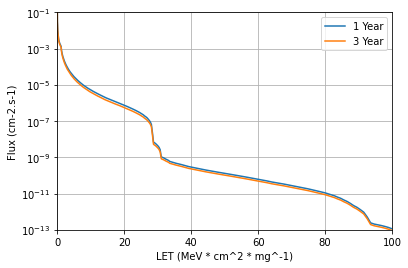

In [2]:
fig, ax = plt.subplots(1,1)

df1y.plot(x=LetFields.let, y=LetFields.flux, ax=ax, label="1 Year")
df3y.plot(x=LetFields.let, y=LetFields.flux, ax=ax, label="3 Year")
ax.set_xbound(lower=0, upper=100)
ax.set_yscale('log')
ax.set_ybound(upper=10e-2, lower=10e-14)
ax.set_xlabel(LetFields.let.value)
ax.set_ylabel(LetFields.flux.value)
ax.grid()
pretty_save(fig, "generated/LET_main.jpg")

In [3]:
fig, ax = plt.subplots(1,1)

df1y.plot(x=LetFields.let, y=LetFields.flux, ax=ax, label="1 Year")
df3y.plot(x=LetFields.let, y=LetFields.flux, ax=ax, label="3 Year")
ax.set_xbound(lower=0, upper=8)
ax.set_yscale('log')
ax.set_ybound(upper=10e-2, lower=5e-6)
ax.set_xlabel(LetFields.let.value)
ax.set_ylabel(LetFields.flux.value)
ax.grid()
pretty_save(fig, "generated/LET_main_short.jpg")

In [4]:
for years, df in {"1": df1y, "3": df3y}.items():
    df["PARTICLES"] = (
        df[LetFields.flux] # s^-1
        * int(years)  # year
        * 365 # day/year
        * 24 # hour/day
        * 60 # min/hour
        * 60 # sec/min
    ) 

    with open(f"generated/LET{years}.csv", "w") as f:
        for let in [1, 5, 15, 30, 60]:
            target_let_idx = (df[LetFields.let] - let).abs().idxmin()
            flux = df.loc[target_let_idx][LetFields.flux]
            particles = df.loc[target_let_idx]["PARTICLES"]
            display(f"LET={let}, Years={years}")
            display(f"Flux={flux:e}, Particles={particles:E}")
            f.write(f"{let},{flux:.2e},{particles:.2e}\n")


'LET=1, Years=1'

'Flux=1.526250e-03, Particles=4.813182E+04'

'LET=5, Years=1'

'Flux=2.814840e-05, Particles=8.876879E+02'

'LET=15, Years=1'

'Flux=1.749710e-06, Particles=5.517885E+01'

'LET=30, Years=1'

'Flux=4.290390e-09, Particles=1.353017E-01'

'LET=60, Years=1'

'Flux=6.154530e-11, Particles=1.940893E-03'

'LET=1, Years=3'

'Flux=1.334460e-03, Particles=1.262506E+05'

'LET=5, Years=3'

'Flux=2.164740e-05, Particles=2.048017E+03'

'LET=15, Years=3'

'Flux=1.311010e-06, Particles=1.240320E+02'

'LET=30, Years=3'

'Flux=3.257500e-09, Particles=3.081856E-01'

'LET=60, Years=3'

'Flux=4.904140e-11, Particles=4.639709E-03'